# Big Data For Decision Making 

Big data refers to the vast volume, variety, and velocity of data generated in today's digital world. This data is characterized by its size, complexity, and rapid accumulation, often exceeding the capacity of traditional data processing methods. Big data encompasses structured data (e.g., databases) as well as unstructured data (e.g., social media posts, sensor data, images, videos). Big data plays a crucial role in decision-making by providing organizations with valuable insights, enabling them to make informed decisions, improve operational efficiency, mitigate risks, and gain a competitive edge in today's data-driven world.

## Candidates:
Mohammad Zareei Davani:220370891

Tiya Grace Chacko:230259641

Mustafa Scentwala:230295100

Vinothini ravikumar: 230289693

<div style="text-align:center">
    <img src="C:\Users\tiyag\Downloads\A202506_web_2880.jpg" alt="Image" width="400" height="300">
</div>


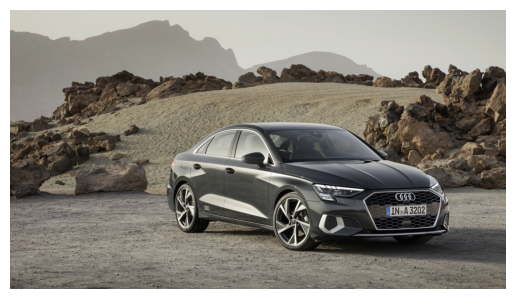

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = "C:/Users/tiyag/Downloads/A202506_web_2880.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


# Predictive Analysis of Accident Severity: Identifying AUDI A3 Car Design Weaknesses


In the UK, car accidents are still a big problem, even though there are efforts to make roads and cars safer. Every year, many accidents happen, causing injuries, deaths, and financial losses. The government and other groups are working hard to improve road safety through things like campaigns to raise awareness, fixing roads, and making laws.

But there are still problems, like how people drive, road conditions, and car safety. To tackle these, there are rules about things like how fast you can drive, fixing roads, and making cars safer.

The predictive analysis of accident severity aims to utilize technical details of car design and specific accident circumstances to forecast the severity of accidents.

The data required for this dataset is taken from "Road Safety Data" dataset hosted on data.gov.uk

## Table of Content
#### 1. Business Objective
#### 2. Import Classes
#### 3. Upload Data Sets
#### 4. Merge Data Sets
#### 5. Spliting the Data Set
#### 6. Exploratory Data Analysis (EDA)
#### 7. Handling Missing Values
##### 7.1 Simple Imputer
#### 8. Outlier Detection
##### 8.1 Isolation Forest
#### 9 Univariate Visualisation
#### 10. Log Transform
#### 11. Bivariate Analysis
#### 12. Feature Selection
#### 13. Feature Scaling
#### 14. Export The Data

## 1. Business Objective

The project centres around a significant challenge faced by a AUDI: forecasting the severity of accidents from technical details of AUDI A3 and specific circumstances under which accidents occur.

The predictive analysis of accident severity is a critical endeavor undertaken by AUDI to utilize technical details of car design and specific accident circumstances. By employing advanced data analytics techniques like machine learning algorithms, this analysis aims to forecast the severity of accidents. Through identifying patterns and correlations between car design features, environmental factors, and accident outcomes, the ultimate goal is to detect weaknesses in car design that may contribute to the severity of accidents. This proactive approach not only helps minimize the risk of accidents but also underscores the commitment of AUDI towards ensuring the safety of their products and the well-being of consumers. By accurately predicting severity, manufacturers can improve safety features, reducing injuries or fatalities, and aligning with their commitment to innovation, safety, and social responsibility.

## 2. Import Classes
Importing classes refers to bringing specific classes or modules from external libraries into your Python script or environment, allowing you to utilize their functionality.We have imported pandas and numpy for data handling and manipulation. The subsequent imports from scikit-learn (train_test_split, IsolationForest, SelectKBest, f_classif, StandardScaler) are for data preprocessing, anomaly detection, feature selection, and scaling, respectively, essential for building robust machine learning models.

In [2]:
# Lets import packages.
# To handle data structures like dataframes, enabling efficient data manipulation and analysis.
import pandas as pd
import numpy as np
# For data processing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

## 3. Upload Data Sets
These lines of code are importing datasets related to road casualty statistics for the last 5 years. The datasets were taken from "Road Safety Data" dataset hosted on data.gov.uk. This dataset contains comprehensive road safety data including information about accidents, casualties, vehicles involved, and other relevant factors. It serves as a valuable resource for conducting analyses related to road safety, such as identifying trends, assessing risk factors, and developing strategies for accident prevention and mitigation.

# Upload Data Sets

In [3]:
df_casualty = pd.read_csv("dft-road-casualty-statistics-casualty-last-5-years.csv") # Import casualty data for the last 5 years dataset.

df_collision = pd.read_csv("dft-road-casualty-statistics-collision-last-5-years.csv") # Import collision data for the last 5 years dataset.

df_vehicle = pd.read_csv("dft-road-casualty-statistics-vehicle-last-5-years.csv") # Import vehicle data for the last 5 years dataset.

C:\Users\tiyag\AppData\Local\Temp\ipykernel_13464\1488793100.py:1: DtypeWarning: Columns (0,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_casualty = pd.read_csv("dft-road-casualty-statistics-casualty-last-5-years.csv") # Import casualty data for the last 5 years dataset.
C:\Users\tiyag\AppData\Local\Temp\ipykernel_13464\1488793100.py:3: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collision = pd.read_csv("dft-road-casualty-statistics-collision-last-5-years.csv") # Import collision data for the last 5 years dataset.
C:\Users\tiyag\AppData\Local\Temp\ipykernel_13464\1488793100.py:5: DtypeWarning: Columns (0,2,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicle = pd.read_csv("dft-road-casualty-statistics-vehicle-last-5-years.csv") # Import vehicle data for the last 5 years dataset.


#### Description of the road collision dataset for the past 5 years

In [4]:
# Show the information of collision dataset.
df_collision.info()
df_collision.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538461 entries, 0 to 538460
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               538461 non-null  object 
 1   accident_year                                538461 non-null  int64  
 2   accident_reference                           538461 non-null  object 
 3   location_easting_osgr                        538325 non-null  float64
 4   location_northing_osgr                       538325 non-null  float64
 5   longitude                                    538325 non-null  float64
 6   latitude                                     538325 non-null  float64
 7   police_force                                 538461 non-null  int64  
 8   accident_severity                            538461 non-null  int64  
 9   number_of_vehicles                           538461 non-nul

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2018010080971,2018,10080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000854
1,2018010080973,2018,10080973,542020.0,184290.0,0.046471,51.539651,1,3,1,...,0,4,1,1,0,0,1,1,2,E01003531
2,2018010080974,2018,10080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,...,5,4,1,1,0,0,1,1,2,E01002723
3,2018010080981,2018,10080981,541450.0,183220.0,0.037828,51.530179,1,2,2,...,5,4,2,2,0,0,1,1,2,E01003492
4,2018010080982,2018,10080982,543580.0,176500.0,0.065781,51.469258,1,2,2,...,0,4,1,2,0,0,1,1,2,E01001682
5,2018010080983,2018,10080983,526060.0,194910.0,-0.179720,51.638879,1,3,2,...,0,4,5,2,0,0,1,1,2,E01000271
6,2018010080986,2018,10080986,525050.0,181050.0,-0.199239,51.514545,1,2,2,...,0,4,1,1,0,0,1,1,2,E01002886
7,2018010080987,2018,10080987,536710.0,176960.0,-0.032886,51.475091,1,3,3,...,0,7,1,1,0,0,1,1,2,E01003215
8,2018010080990,2018,10080990,517110.0,186280.0,-0.311872,51.563250,1,3,2,...,8,4,1,1,0,0,1,1,2,E01000564
9,2018010080992,2018,10080992,535450.0,181190.0,-0.049395,51.513407,1,2,2,...,4,4,1,1,0,0,1,1,2,E01004305


#### Description of the road vehicle dataset for the past 5 years

In [5]:
# Show the information of vehicle dataset.
df_vehicle.info()
df_vehicle.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990153 entries, 0 to 990152
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   accident_index                    990153 non-null  object
 1   accident_year                     990153 non-null  int64 
 2   accident_reference                990153 non-null  object
 3   vehicle_reference                 990153 non-null  int64 
 4   vehicle_type                      990153 non-null  int64 
 5   towing_and_articulation           990153 non-null  int64 
 6   vehicle_manoeuvre                 990153 non-null  int64 
 7   vehicle_direction_from            990153 non-null  int64 
 8   vehicle_direction_to              990153 non-null  int64 
 9   vehicle_location_restricted_lane  990153 non-null  int64 
 10  junction_location                 990153 non-null  int64 
 11  skidding_and_overturning          990153 non-null  int64 
 12  hi

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2018010080971,2018,10080971,1,9,0,18,3,7,0,...,1,32,6,1995,2,5,BMW 5 SERIES,8,1,E01011051
1,2018010080971,2018,10080971,2,8,0,18,3,7,0,...,1,48,8,1798,8,6,TOYOTA PRIUS+,1,1,E01002066
2,2018010080973,2018,10080973,1,9,0,18,3,7,0,...,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,2018,10080974,1,8,0,7,1,4,0,...,1,40,7,1797,8,6,TOYOTA PRIUS,3,1,E01000185
4,2018010080974,2018,10080974,2,9,0,18,4,8,0,...,1,21,5,-1,-1,-1,-1,5,1,E01000036
5,2018010080981,2018,10080981,1,9,0,9,7,1,0,...,1,27,6,1200,1,1,PEUGEOT 308,7,1,E01003643
6,2018010080981,2018,10080981,2,19,0,18,3,7,0,...,1,30,6,-1,-1,-1,-1,3,1,E01003588
7,2018010080982,2018,10080982,1,8,0,18,3,7,0,...,1,43,7,1798,8,1,TOYOTA PRIUS+,4,1,E01003308
8,2018010080982,2018,10080982,2,9,0,18,7,3,0,...,1,55,8,-1,-1,-1,-1,3,1,E01000392
9,2018010080983,2018,10080983,1,9,0,18,1,5,0,...,2,63,9,4196,1,11,JAGUAR S TYPE,10,1,E01000280


In [6]:
# Extra Features (references features) we do not need then for the predictive modelling.

casualty_extra = ['accident_index', 'accident_year', 'vehicle_reference', 'casualty_reference', 'lsoa_of_casualty']
df_casualty.drop(casualty_extra, axis=1, inplace=True)

collision_extra = ['accident_index', 'accident_year', 'lsoa_of_accident_location', 'location_easting_osgr', 
                   'location_northing_osgr', 'longitude', 'latitude', 'local_authority_ons_district', 'local_authority_highway']
df_collision.drop(collision_extra, axis=1, inplace=True)

vehicle_extra = ['accident_index', 'accident_year', 'vehicle_reference', 'lsoa_of_driver']
df_vehicle.drop(vehicle_extra, axis=1, inplace=True)

# 4. Merge Data Sets
 This merge combines additional information about collisions with the existing casualty and vehicle data, providing a comprehensive dataset with information about casualties, vehicles, and collisions associated with each accident.

In [7]:
df = pd.merge(df_casualty, df_vehicle, how='inner', on='accident_reference')
df = pd.merge(df, df_collision, how='inner', on='accident_reference')
df

,accident_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,010135259,1,2,18,4,3,0,0,0,0,...,0,1,1,1,1,0,0,1,2,2
1,010135259,1,2,18,4,3,0,0,0,0,...,0,1,1,1,1,0,0,1,2,2
2,010135261,3,2,30,6,3,10,9,0,0,...,9,4,1,1,1,0,0,1,2,2
3,010135264,3,1,35,6,3,5,3,0,0,...,0,0,1,1,1,0,0,1,1,2
4,010135268,2,2,73,10,3,0,0,1,0,...,0,0,4,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967210,991129997,1,1,18,4,3,0,0,0,0,...,0,0,4,1,2,0,0,1,1,-1
967211,991129997,1,1,18,4,3,0,0,0,0,...,0,0,4,1,2,0,0,1,1,-1
967212,991129997,1,2,29,6,3,0,0,0,0,...,0,0,4,1,2,0,0,1,1,-1
967213,991129997,1,2,29,6,3,0,0,0,0,...,0,0,4,1,2,0,0,1,1,-1


### Description of the merged dataset
This summary provides descriptive statistics for numerical columns in the merged DataFrame. They provide a summary of the range and spread of values, aiding in understanding the overall characteristics of the dataset.

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967215 entries, 0 to 967214
Data columns (total 63 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   accident_reference                           967215 non-null  object
 1   casualty_class                               967215 non-null  int64 
 2   sex_of_casualty                              967215 non-null  int64 
 3   age_of_casualty                              967215 non-null  int64 
 4   age_band_of_casualty                         967215 non-null  int64 
 5   casualty_severity                            967215 non-null  int64 
 6   pedestrian_location                          967215 non-null  int64 
 7   pedestrian_movement                          967215 non-null  int64 
 8   car_passenger                                967215 non-null  int64 
 9   bus_or_coach_passenger                       967215 non-null  int64 
 

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,...,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000,967215.000000
mean,1.371526,1.382870,37.211581,6.376045,2.817817,0.433725,0.346867,0.262943,0.045312,0.015214,...,0.215715,0.969870,1.997791,1.607874,1.346917,0.183217,0.127328,1.380348,1.328193,1.598877
std,0.623658,0.517918,19.207000,2.399299,0.415708,1.668893,1.507096,0.632855,0.414214,0.175590,...,1.330309,2.203165,1.699824,1.745213,0.822501,1.099704,0.944200,0.486134,0.595309,0.927581
min,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,3.000000,9.000000,102.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,3.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [9]:
# We do not need Date and Time, because we do not want to use time series.
df.drop('date', axis=1, inplace=True)
df.drop('time', axis=1, inplace=True)

# We do not need vehicle_reference any more.
df.drop('accident_reference', axis=1, inplace=True)

### Removing unnecessary columns

By dropping these columns, the DataFrame becomes more focused on the relevant features for the analysis, which can improve computational efficiency and make subsequent data processing and modeling tasks more straightforward.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967215 entries, 0 to 967214
Data columns (total 60 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   casualty_class                               967215 non-null  int64 
 1   sex_of_casualty                              967215 non-null  int64 
 2   age_of_casualty                              967215 non-null  int64 
 3   age_band_of_casualty                         967215 non-null  int64 
 4   casualty_severity                            967215 non-null  int64 
 5   pedestrian_location                          967215 non-null  int64 
 6   pedestrian_movement                          967215 non-null  int64 
 7   car_passenger                                967215 non-null  int64 
 8   bus_or_coach_passenger                       967215 non-null  int64 
 9   pedestrian_road_maintenance_worker           967215 non-null  int64 
 

## 5. Spliting the Data Set

 We are splitting the dataset into two subsets to facilitate model training and evaluation. The training set is used to train the model, while the test set is used to evaluate how well the trained model generalizes to unseen data.
 
 We used strarify to ensure that the distribution of the target variable (accident severity) is preserved in both the training and test sets. It helps ensure that both sets have similar proportions of accidents with different severity levels.

In [11]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=7, stratify=df["accident_severity"])
print(f"{trainset.shape[0]} training and {testset.shape[0]} test instances")

773772 training and 193443 test instances


In [12]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773772 entries, 593270 to 878663
Data columns (total 60 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   casualty_class                               773772 non-null  int64 
 1   sex_of_casualty                              773772 non-null  int64 
 2   age_of_casualty                              773772 non-null  int64 
 3   age_band_of_casualty                         773772 non-null  int64 
 4   casualty_severity                            773772 non-null  int64 
 5   pedestrian_location                          773772 non-null  int64 
 6   pedestrian_movement                          773772 non-null  int64 
 7   car_passenger                                773772 non-null  int64 
 8   bus_or_coach_passenger                       773772 non-null  int64 
 9   pedestrian_road_maintenance_worker           773772 non-null  int64 
 

# 6. Exploratory Data Analysis (EDA)
EDA serves as a critical foundation for understanding the dataset's structure and characteristics, informing subsequent data preprocessing, modeling decisions, and hypothesis formulation. It helps data analysts and scientists gain insights into the data, uncover patterns, and make informed decisions throughout the analysis process.

### Distribution of Categorical Variables

In [13]:
#
trainset['generic_make_model'].value_counts().head(30)

generic_make_model
-1                   179471
FORD FIESTA           25109
VAUXHALL CORSA        20663
FORD FOCUS            18967
VAUXHALL ASTRA        18788
VOLKSWAGEN GOLF       18322
BMW 3 SERIES          12470
VOLKSWAGEN POLO       11092
AUDI A3                8259
BMW 1 SERIES           7920
TOYOTA YARIS           7899
RENAULT CLIO           7757
MERCEDES C CLASS       7586
FORD TRANSIT           7558
NISSAN QASHQAI         6733
VAUXHALL ZAFIRA        6448
HONDA CIVIC            5938
MERCEDES A CLASS       5353
MERCEDES SPRINTER      5257
TOYOTA PRIUS           5218
MINI COOPER            5137
AUDI A4                5069
VOLKSWAGEN PASSAT      5068
FORD MONDEO            4990
BMW 5 SERIES           4775
VAUXHALL INSIGNIA      4717
NISSAN MICRA           4633
FIAT 500               4620
SEAT IBIZA             4618
SKODA OCTAVIA          4546
Name: count, dtype: int64

#### By narrowing our scope to the Audi A3, we can delve deeper into the characteristics, performance, and potential safety implications specific to this model.

In [14]:
# Choose AUDI A3.
trainset = trainset[trainset['generic_make_model'] == 'AUDI A3']
testset = testset[testset['generic_make_model'] == 'AUDI A3']

# We do not need generic_make_model any more because all its variable are similar to AUDI A3.
trainset.drop(columns=['generic_make_model'], inplace=True)
testset.drop(columns=['generic_make_model'], inplace=True)

trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8259 entries, 272072 to 695459
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   casualty_class                               8259 non-null   int64
 1   sex_of_casualty                              8259 non-null   int64
 2   age_of_casualty                              8259 non-null   int64
 3   age_band_of_casualty                         8259 non-null   int64
 4   casualty_severity                            8259 non-null   int64
 5   pedestrian_location                          8259 non-null   int64
 6   pedestrian_movement                          8259 non-null   int64
 7   car_passenger                                8259 non-null   int64
 8   bus_or_coach_passenger                       8259 non-null   int64
 9   pedestrian_road_maintenance_worker           8259 non-null   int64
 10  casualty_type         

## 7. Handling Missing Values

### 7.1 Simple Imputer
By using SimpleImputer, we can effectively handle missing values in a dataset, ensuring that our data is ready for further analysis or model training.

In [15]:
#we convert values with -1 to NaN values to identify missing values
trainset.replace(-1, float('NaN'), inplace=True)
testset.replace(-1, float('NaN'), inplace=True)

In [16]:
# number of missingvalues in each column
trainset.isnull().sum()

casualty_class                                    0
sex_of_casualty                                  52
age_of_casualty                                 164
age_band_of_casualty                            164
casualty_severity                                 0
pedestrian_location                               0
pedestrian_movement                               0
car_passenger                                    37
bus_or_coach_passenger                            2
pedestrian_road_maintenance_worker                2
casualty_type                                     1
casualty_home_area_type                         736
casualty_imd_decile                             748
vehicle_type                                      0
towing_and_articulation                          28
vehicle_manoeuvre                                25
vehicle_direction_from                          104
vehicle_direction_to                            118
vehicle_location_restricted_lane                 27
junction_loc

In [17]:
# impute missing values in each column with the median of that column.
imputer = SimpleImputer(strategy="median")

imputer.fit(trainset)

SimpleImputer(strategy='median')

In [18]:
# The transform method returns a np array, so we create a pd.DataFrame from it
trainset = pd.DataFrame(imputer.transform(trainset), columns=trainset.columns, index=trainset.index)
testset = pd.DataFrame(imputer.transform(testset), columns=testset.columns, index=testset.index)

trainset

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
272072,1.0,2.0,35.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0
587024,3.0,2.0,13.0,3.0,3.0,1.0,9.0,0.0,0.0,0.0,...,0.0,5.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0
383088,1.0,1.0,43.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
285901,2.0,2.0,53.0,8.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0
905942,1.0,1.0,52.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122338,1.0,2.0,36.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0
218439,1.0,2.0,18.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,1.0,1.0,1.0,4.0,0.0,2.0,2.0,2.0
172858,2.0,1.0,21.0,5.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0
898959,1.0,1.0,22.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0


Now, both the trainset and testset DataFrames have been imputed with median values, ensuring that missing values have been appropriately handled for further analysis or modeling.

In [19]:
# check if there are missing values now
trainset.isnull().sum()

casualty_class                                 0
sex_of_casualty                                0
age_of_casualty                                0
age_band_of_casualty                           0
casualty_severity                              0
pedestrian_location                            0
pedestrian_movement                            0
car_passenger                                  0
bus_or_coach_passenger                         0
pedestrian_road_maintenance_worker             0
casualty_type                                  0
casualty_home_area_type                        0
casualty_imd_decile                            0
vehicle_type                                   0
towing_and_articulation                        0
vehicle_manoeuvre                              0
vehicle_direction_from                         0
vehicle_direction_to                           0
vehicle_location_restricted_lane               0
junction_location                              0
skidding_and_overtur

In [20]:
# trainset.dropna()
# testset.dropna()

# trainset

## 8. Outlier Detection

Outlier detection is a crucial step in data analysis and preprocessing, aimed at identifying data points that deviate significantly from the rest of the dataset.

### 8.1 Isolation Forest

Isolation Forest is an unsupervised machine learning algorithm used for outlier detection. It works by isolating outliers in the dataset using decision trees

In [21]:
Xtrain = trainset.drop('accident_severity', axis=1)
ytrain = trainset['accident_severity'].copy()
Xtest = testset.drop('accident_severity', axis=1)
ytest = testset['accident_severity'].copy()

In [22]:
Xtrain.shape, Xtest.shape

((8259, 58), (1976, 58))

In [23]:
clf = IsolationForest(n_estimators=100, random_state=7, contamination=0.03).fit(Xtrain)
yhat = clf.predict(Xtrain)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
Xtrain = Xtrain[yhat != -1]
ytrain = ytrain[yhat != -1]
Xtrain.shape

(8011, 58)

In [25]:
yhat = clf.predict(Xtest)
Xtest = Xtest[yhat == 1]
ytest = ytest[yhat != -1]
Xtest.shape

(1932, 58)

## 9 Univariate Visualisation
Univariate analysis focuses on examining the distribution and characteristics of individual variables in a dataset.By performing univariate analysis, you gain insights into the individual variables' characteristics and distributions, which can help identify potential patterns, outliers, or data quality issues. Univariate analysis serves as a foundational step in exploratory data analysis, providing a starting point for further investigation and hypothesis formulation.

array([[<Axes: title={'center': 'casualty_class'}>,
        <Axes: title={'center': 'sex_of_casualty'}>,
        <Axes: title={'center': 'age_of_casualty'}>,
        <Axes: title={'center': 'age_band_of_casualty'}>,
        <Axes: title={'center': 'casualty_severity'}>,
        <Axes: title={'center': 'pedestrian_location'}>,
        <Axes: title={'center': 'pedestrian_movement'}>,
        <Axes: title={'center': 'car_passenger'}>],
       [<Axes: title={'center': 'bus_or_coach_passenger'}>,
        <Axes: title={'center': 'pedestrian_road_maintenance_worker'}>,
        <Axes: title={'center': 'casualty_type'}>,
        <Axes: title={'center': 'casualty_home_area_type'}>,
        <Axes: title={'center': 'casualty_imd_decile'}>,
        <Axes: title={'center': 'vehicle_type'}>,
        <Axes: title={'center': 'towing_and_articulation'}>,
        <Axes: title={'center': 'vehicle_manoeuvre'}>],
       [<Axes: title={'center': 'vehicle_direction_from'}>,
        <Axes: title={'center': 've

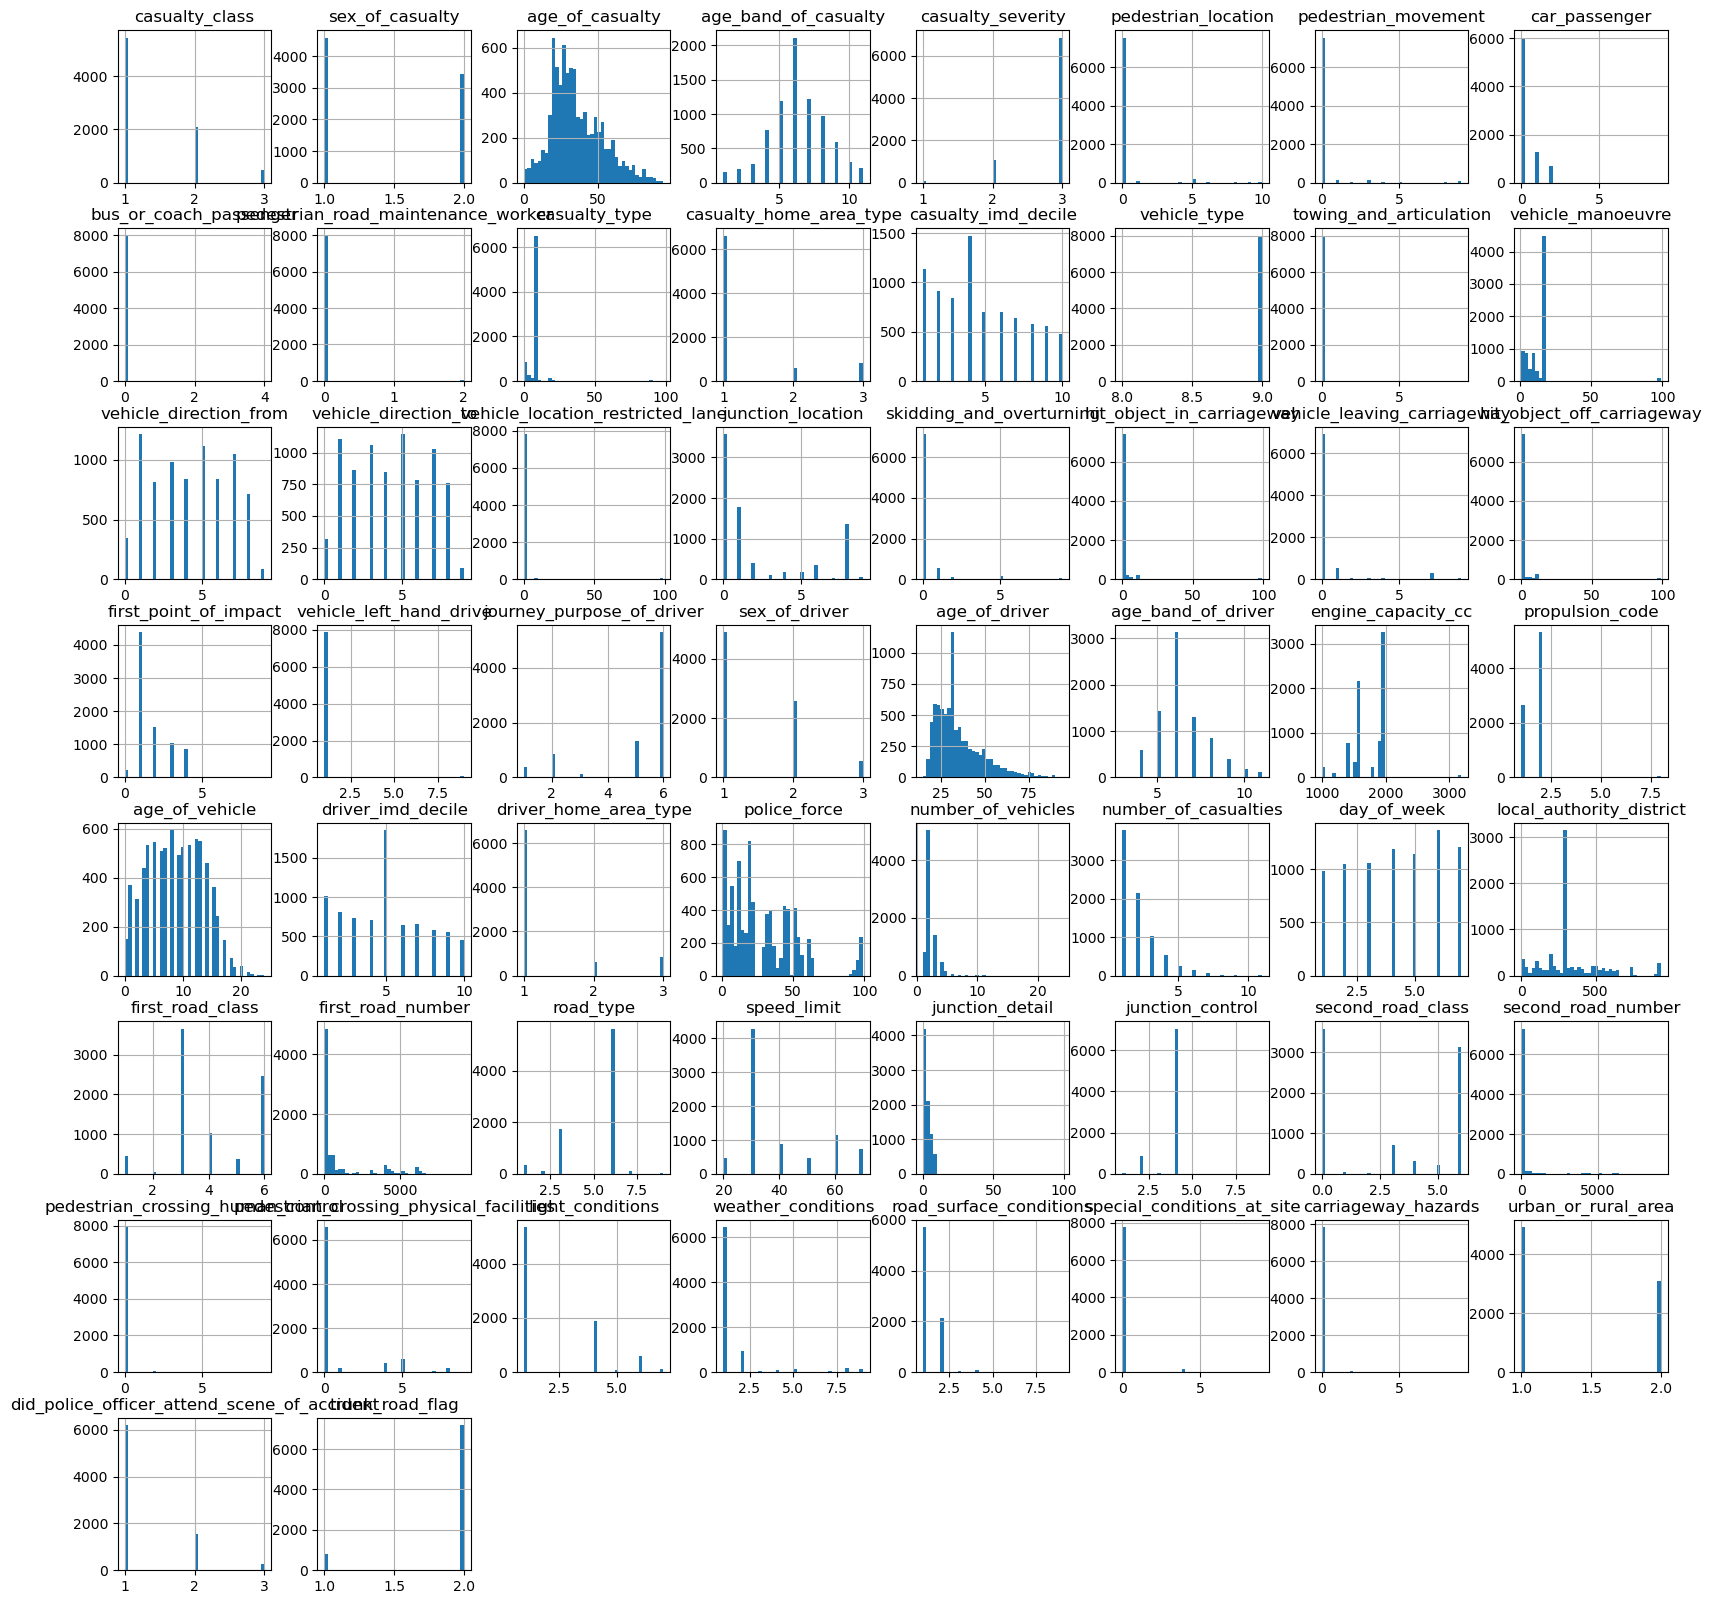

In [26]:
# create histograms for each feature
Xtrain.hist(bins=40, figsize=(20,20))

# 10. Log Transform
The log transform is a data transformation technique commonly used in statistical analysis and data preprocessing

In [27]:
# transform features using natural log function to make distribution more symmetric
# log_features = Xtrain.columns.tolist()
log_features = ['age_of_casualty', 'car_passenger', 'casualty_type', 'casualty_imd_decile', 'vehicle_manoeuvre', 
                'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 
               'hit_object_off_carriageway', 'first_point_of_impact', 'journey_purpose_of_driver', 'age_of_driver', 
                'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'police_force', 'number_of_vehicles', 
                'number_of_casualties', 'first_road_number', 'speed_limit', 'junction_detail', 'second_road_number', 
               'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'weather_conditions', 
                'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards']

for col in log_features:
    Xtrain.loc[:, col] = np.log(Xtrain.loc[:, col] + 1)
    Xtest.loc[:, col] = np.log(Xtest.loc[:, col] + 1)

array([[<Axes: title={'center': 'casualty_class'}>,
        <Axes: title={'center': 'sex_of_casualty'}>,
        <Axes: title={'center': 'age_of_casualty'}>,
        <Axes: title={'center': 'age_band_of_casualty'}>,
        <Axes: title={'center': 'casualty_severity'}>,
        <Axes: title={'center': 'pedestrian_location'}>,
        <Axes: title={'center': 'pedestrian_movement'}>,
        <Axes: title={'center': 'car_passenger'}>],
       [<Axes: title={'center': 'bus_or_coach_passenger'}>,
        <Axes: title={'center': 'pedestrian_road_maintenance_worker'}>,
        <Axes: title={'center': 'casualty_type'}>,
        <Axes: title={'center': 'casualty_home_area_type'}>,
        <Axes: title={'center': 'casualty_imd_decile'}>,
        <Axes: title={'center': 'vehicle_type'}>,
        <Axes: title={'center': 'towing_and_articulation'}>,
        <Axes: title={'center': 'vehicle_manoeuvre'}>],
       [<Axes: title={'center': 'vehicle_direction_from'}>,
        <Axes: title={'center': 've

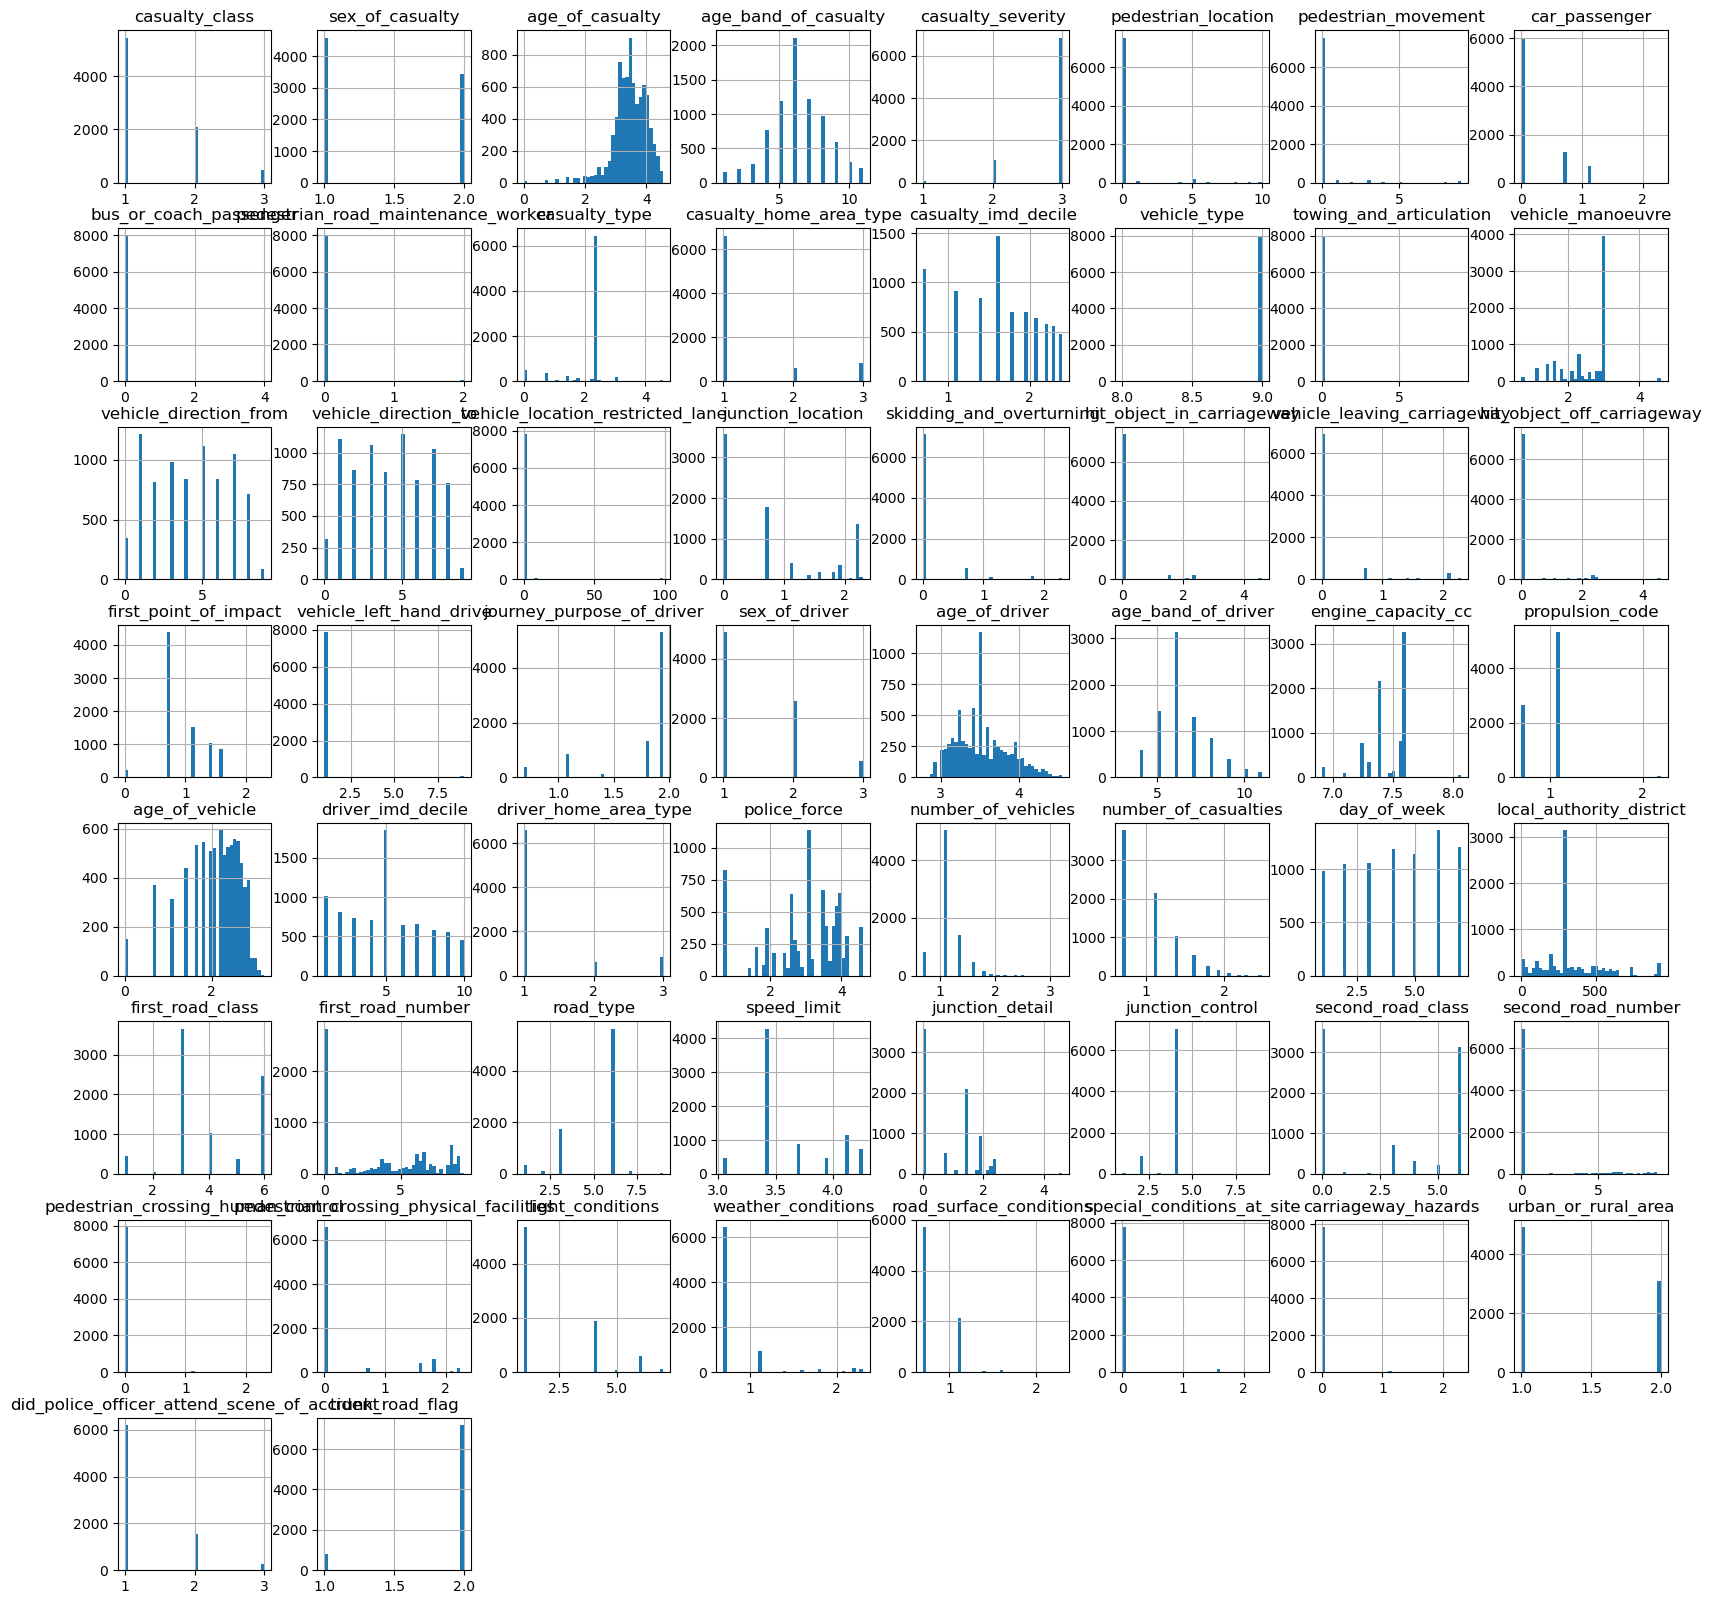

In [28]:
# create histogram after log transformation
Xtrain.hist(bins=40, figsize=(20,20))

## 11. Bivariate
Bivariate analysis examines the relationship between two variables in a dataset.Bivariate analysis helps uncover relationships, associations, and dependencies between pairs of variables in a dataset, providing valuable insights into how variables interact with each other. It serves as a fundamental step in exploratory data analysis, informing subsequent analysis, modeling, and decision-making processes

In [29]:
# Combine X and y together to find the correlations
trainset = Xtrain.copy()
trainset['accident_severity'] = ytrain.values
testset = Xtest.copy()
testset['accident_severity'] = ytest.values

In [30]:
# calculate the correlation between variables using the pearson's correlation
corr_matrix = trainset.corr(method="pearson", numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,accident_severity
casualty_class,1.000,0.138,-0.280,-0.238,-0.084,0.614,0.544,0.571,0.062,0.211,-0.468,-0.079,-0.083,-0.014,-0.009,-0.000,-0.014,-0.002,-0.037,-0.034,-0.058,-0.026,-0.020,-0.025,-0.033,-0.036,0.061,-0.016,-0.052,-0.053,0.017,0.005,0.029,-0.058,-0.065,-0.014,-0.245,0.126,0.025,-0.009,0.086,-0.063,0.030,-0.089,-0.007,-0.018,-0.014,0.002,-0.015,0.062,0.039,0.003,0.006,-0.009,-0.015,-0.082,-0.015,0.027,-0.078
sex_of_casualty,0.138,1.000,0.024,0.032,0.088,-0.001,-0.011,0.165,0.040,0.007,0.071,0.035,0.032,0.008,-0.006,-0.025,-0.004,-0.001,-0.019,-0.015,-0.055,-0.025,-0.048,-0.050,0.015,-0.020,0.005,0.215,0.047,0.043,-0.016,0.004,-0.009,0.022,0.015,0.067,0.013,0.022,0.005,0.046,0.009,0.003,0.008,0.011,-0.002,-0.014,0.003,0.018,-0.020,-0.001,-0.053,0.006,0.000,0.001,-0.021,0.021,0.042,0.003,0.090
age_of_casualty,-0.280,0.024,1.000,0.952,-0.035,-0.068,-0.052,-0.326,-0.067,-0.006,0.073,0.071,0.113,0.013,-0.001,-0.048,-0.005,-0.006,0.007,0.006,-0.013,-0.031,-0.025,-0.026,-0.005,0.001,-0.022,0.019,0.245,0.243,-0.021,-0.016,-0.038,0.077,0.051,0.040,0.088,-0.116,-0.017,0.029,-0.069,0.040,-0.020,0.072,0.001,-0.011,0.001,0.000,-0.010,-0.020,-0.060,-0.010,-0.023,0.019,-0.014,0.062,-0.019,-0.030,-0.019
age_band_of_casualty,-0.238,0.032,0.952,1.000,-0.041,-0.051,-0.036,-0.284,-0.038,-0.010,0.063,0.077,0.120,0.016,-0.003,-0.053,-0.012,-0.008,0.001,0.001,-0.023,-0.037,-0.036,-0.041,-0.006,-0.004,-0.017,0.028,0.287,0.296,-0.023,-0.020,-0.040,0.086,0.051,0.052,0.091,-0.104,-0.012,0.043,-0.064,0.039,-0.015,0.073,-0.003,-0.005,-0.002,-0.006,-0.013,-0.025,-0.082,-0.016,-0.029,0.016,-0.008,0.065,-0.032,-0.028,-0.029
casualty_severity,-0.084,0.088,-0.035,-0.041,1.000,-0.117,-0.109,0.034,0.013,-0.041,0.154,-0.021,-0.013,0.006,-0.036,-0.059,-0.014,0.020,0.032,0.064,-0.013,0.016,-0.075,-0.038,0.040,0.041,-0.004,0.025,-0.002,-0.003,-0.022,0.004,-0.024,-0.030,-0.049,-0.045,0.051,0.019,-0.009,-0.013,0.002,-0.014,-0.045,-0.080,0.068,-0.038,0.069,0.041,0.027,0.055,-0.077,0.034,-0.005,0.012,0.006,-0.087,0.094,-0.007,0.790
pedestrian_location,0.614,-0.001,-0.068,-0.051,-0.117,1.000,0.833,-0.125,-0.013,0.260,-0.703,-0.039,-0.028,-0.018,-0.008,-0.041,-0.019,-0.008,-0.013,-0.054,-0.053,-0.030,-0.053,-0.050,-0.008,-0.017,-0.010,0.029,-0.018,-0.017,0.005,0.002,0.014,-0.037,-0.049,-0.020,-0.314,-0.163,0.008,-0.011,0.144,-0.110,0.063,-0.140,-0.024,0.023,-0.021,-0.022,-0.011,0.002,-0.001,0.005,-0.003,-0.001,-0.007,-0.122,-0.001,0.062,-0.066
pedestrian_movement,0.544,-0.011,-0.052,-0.036,-0.109,0.833,1.000,-0.111,-0.012,0.223,-0.624,-0.034,-0.018,-0.037,-0.007,-0.054,-0.022,-0.017,-0.007,-0.050,-0.042,-0.019,-0.036,-0.034,-0.018,-0.020,0.004,0.035,-0.027,-0.030,0.011,0.006,0.020,-0.036,-0.054,-0.026,-0.263,-0.136,0.009,-0.021,0.130,-0.099,0.051,-0.125,-0.015,0.001,-0.018,-0.019,-0

In [31]:
# Calculate correlation matrix between features and the target variable
corr_with_target = trainset.corr()['accident_severity'].abs().sort_values(ascending=False)

# Remove features that have high correlation with each other
# Except the one which has highest correlation with the target variable
selected_features = set()
dropped_features = set()
for feature in corr_matrix:
    selected_features.add(feature)
    # Find features highly correlated with the current feature
    highly_correlated = corr_matrix[feature][corr_matrix[feature] > 0.65].index.tolist()
    # Keep the feature with the highest correlation with the target variable
    target_corr = corr_with_target[highly_correlated].idxmax()
    highly_correlated.remove(target_corr)
    # Remove the highly correlated features
    dropped_features.update(highly_correlated)

# Remove redundant features from the dataset
trainset.drop(columns=dropped_features, inplace=True)
testset.drop(columns=dropped_features, inplace=True)

dropped_features

{'age_band_of_driver',
 'age_of_casualty',
 'casualty_severity',
 'hit_object_off_carriageway',
 'junction_detail',
 'junction_location',
 'local_authority_district',
 'pedestrian_movement',
 'speed_limit',
 'vehicle_location_restricted_lane'}

This process helps mitigate multicollinearity issues by retaining only one feature from highly correlated groups while preserving the feature most correlated with the target variable. It ensures that the dataset remains informative and optimized for modeling purposes.

In [32]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8011 entries, 272072 to 695459
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   casualty_class                               8011 non-null   float64
 1   sex_of_casualty                              8011 non-null   float64
 2   age_band_of_casualty                         8011 non-null   float64
 3   pedestrian_location                          8011 non-null   float64
 4   car_passenger                                8011 non-null   float64
 5   bus_or_coach_passenger                       8011 non-null   float64
 6   pedestrian_road_maintenance_worker           8011 non-null   float64
 7   casualty_type                                8011 non-null   float64
 8   casualty_home_area_type                      8011 non-null   float64
 9   casualty_imd_decile                          8011 non-null   float64
 10

In [33]:
# Correlation with target variable
sub_corr_target = pd.DataFrame(trainset.corr()['accident_severity'].abs().sort_values(ascending=False))
sub_corr_target

,accident_severity
accident_severity,1.000000
number_of_casualties,0.175700
urban_or_rural_area,0.152958
did_police_officer_attend_scene_of_accident,0.131126
vehicle_leaving_carriageway,0.116252
light_conditions,0.104151
second_road_class,0.101070
sex_of_casualty,0.090252
casualty_class,0.078281
vehicle_manoeuvre,0.077188


In [34]:
# Removing features with low correlation (<0.05) to the target variable.
low_corr = sub_corr_target[sub_corr_target['accident_severity'] < 0.05].index

trainset.drop(columns=low_corr, inplace=True)
testset.drop(columns=low_corr, inplace=True)

trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8011 entries, 272072 to 695459
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   casualty_class                               8011 non-null   float64
 1   sex_of_casualty                              8011 non-null   float64
 2   pedestrian_location                          8011 non-null   float64
 3   casualty_type                                8011 non-null   float64
 4   vehicle_manoeuvre                            8011 non-null   float64
 5   vehicle_leaving_carriageway                  8011 non-null   float64
 6   first_point_of_impact                        8011 non-null   float64
 7   vehicle_left_hand_drive                      8011 non-null   float64
 8   driver_home_area_type                        8011 non-null   float64
 9   police_force                                 8011 non-null   float64
 10

Focus on the most relevant features that are likely to contribute to predicting the target variable accurately.

## 12. Feature Selection
Feature selection is a critical step in machine learning and data analysis, involving the identification and selection of a subset of relevant features from the original dataset. 

In [35]:
# drop accident severity
Xtrain = trainset.drop('accident_severity', axis=1)
ytrain = trainset['accident_severity'].copy()
Xtest = testset.drop('accident_severity', axis=1)
ytest = testset['accident_severity'].copy()

In [36]:
Xtrain.shape

(8011, 18)

In [37]:
# Pick features by using KBest
selector = SelectKBest(f_classif, k=10)
Xtrain = selector.fit_transform(Xtrain, ytrain)
Xtest = selector.transform(Xtest)

In [38]:
Xtrain.shape, Xtest.shape

((8011, 10), (1932, 10))

In [39]:
# get the names of the selected features
selector.get_feature_names_out()

array(['casualty_class', 'sex_of_casualty', 'vehicle_manoeuvre',
       'vehicle_leaving_carriageway', 'number_of_casualties',
       'second_road_class', 'pedestrian_crossing_physical_facilities',
       'light_conditions', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident'], dtype=object)

In [40]:
# dataset with elected features
Xtrain = pd.DataFrame(Xtrain, columns=selector.get_feature_names_out())
Xtest = pd.DataFrame(Xtest, columns=selector.get_feature_names_out())
Xtrain

,casualty_class,sex_of_casualty,vehicle_manoeuvre,vehicle_leaving_carriageway,number_of_casualties,second_road_class,pedestrian_crossing_physical_facilities,light_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,1.0,2.0,2.197225,0.0,1.098612,0.0,1.791759,1.0,1.0,2.0
1,3.0,2.0,2.944439,0.0,0.693147,6.0,1.791759,4.0,1.0,1.0
2,1.0,1.0,2.564949,0.0,1.098612,6.0,0.000000,1.0,1.0,1.0
3,2.0,2.0,1.791759,0.0,1.098612,6.0,1.609438,4.0,1.0,2.0
4,1.0,1.0,1.609438,0.0,1.609438,6.0,0.000000,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8006,1.0,2.0,1.386294,0.0,0.693147,0.0,0.000000,1.0,1.0,2.0
8007,1.0,2.0,2.708050,0.0,0.693147,0.0,2.197225,1.0,2.0,2.0
8008,2.0,1.0,2.944439,0.0,0.693147,0.0,0.000000,1.0,2.0,1.0
8009,1.0,1.0,1.098612,0.0,0.693147,6.0,0.000000,1.0,1.0,1.0


In [41]:
Xtrain.describe()

,casualty_class,sex_of_casualty,vehicle_manoeuvre,vehicle_leaving_carriageway,number_of_casualties,second_road_class,pedestrian_crossing_physical_facilities,light_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident
count,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000,8011.000000
mean,1.379728,1.427662,2.491429,0.179275,1.028702,2.915741,0.295038,2.196230,1.385345,1.256772
std,0.595118,0.494770,0.662018,0.512713,0.378303,2.775677,0.660546,1.789396,0.486707,0.504019
min,1.000000,1.000000,0.693147,0.000000,0.693147,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.079442,0.000000,0.693147,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.944439,0.000000,1.098612,3.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.944439,0.000000,1.386294,6.000000,0.000000,4.000000,2.000000,1.000000
max,3.000000,2.000000,4.605170,2.302585,2.484907,6.000000,2.302585,7.000000,2.000000,3.000000


In [42]:
pd.DataFrame(ytest)
pd.DataFrame(ytrain).value_counts()

accident_severity
3.0                  6381
2.0                  1484
1.0                   146
Name: count, dtype: int64

## 13. Feature Scaling

Feature scaling is a preprocessing technique used to standardize or normalize the range of independent variables or features in a dataset

In [43]:
# scale the features
scaler = StandardScaler()
# transform the data and compute mean and SD
scaled_vals = scaler.fit_transform(Xtrain)
Xtrain = pd.DataFrame(scaled_vals, columns=Xtrain.columns)

scaled_vals = scaler.transform(Xtest)
Xtest = pd.DataFrame(scaled_vals, columns=Xtest.columns)

Xtrain

,casualty_class,sex_of_casualty,vehicle_manoeuvre,vehicle_leaving_carriageway,number_of_casualties,second_road_class,pedestrian_crossing_physical_facilities,light_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,-0.638111,1.156847,-0.444433,-0.349682,0.184810,-1.050527,2.266025,-0.668552,-0.791789,1.474696
1,2.722775,1.156847,0.684329,-0.349682,-0.887055,1.111243,2.266025,1.008096,-0.791789,-0.509481
2,-0.638111,-0.864418,0.111062,-0.349682,0.184810,1.111243,-0.446686,-0.668552,-0.791789,-0.509481
3,1.042332,1.156847,-1.056940,-0.349682,0.184810,1.111243,1.989992,1.008096,-0.791789,1.474696
4,-0.638111,-0.864418,-1.332360,-0.349682,1.535201,1.111243,-0.446686,-0.668552,1.262963,-0.509481
...,...,...,...,...,...,...,...,...,...,...
8006,-0.638111,1.156847,-1.669447,-0.349682,-0.887055,-1.050527,-0.446686,-0.668552,-0.791789,1.474696
8007,-0.638111,1.156847,0.327234,-0.349682,-0.887055,-1.050527,2.879896,-0.668552,1.262963,1.474696
8008,1.042332,-0.864418,0.684329,-0.349682,-0.887055,-1.050527,-0.446686,-0.668552,1.262963,-0.509481
8009,-0.638111,-0.864418,-2.104027,-0.349682,-0.887055,1.111243,-0.446686,-0.668552,-0.791789,-0.509481


## 14. Export The Data
We are exporting the data for predictive modelling

In [44]:
# Put X and y together before exporting
trainset = Xtrain.copy()
trainset['accident_severity'] = ytrain.values
testset = Xtest.copy()
testset['accident_severity'] = ytest.values

In [45]:
# Export the data into CSV
trainset.to_csv("trainset.csv", index=False)
testset.to_csv("testset.csv", index=False)

In [48]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [49]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1257
